# Image Processing - Morphology
in this notebook, some morphological operations will be performed. First, the image itself and some general information is shown. The map is a binary land cover map, showing sealed surfaces in West Africa (Nigeria, Benin and Togo).

In [ ]:
import scipy.ndimage
import rasterio
import skimage.morphology
from matplotlib import pyplot as plt
import matplotlib

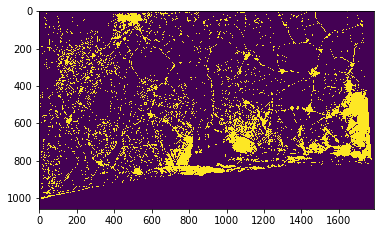

In [39]:
# Read image and raster
src = rasterio.open("binary_land_classification_final.tif")
array = src.read(1)

pyplot.imshow(array)

In [55]:
print("GENERAL INFO:")
print("TIF CRS:\t\t",src.crs)
print("Array shape:\t\t",array.shape)
print("Array No. of pixels:\t", array.size)
print("Image data type:\t",array.dtype)
print("Max value of raster:\t",array.max())
print("Min value of raster:\t",array.min())

GENERAL INFO:
TIF CRS:		 EPSG:4326
Array shape:		 (1057, 1789)
Array No. of pixels:	 1890973
Image data type:	 int16
Max value of raster:	 1
Min value of raster:	 0


# Image Morphology
## Erosion

In [71]:
from skimage.morphology import (erosion, dilation, opening, closing, white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk
import numpy as np

In [68]:
# define comparison pot (source:https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html#sphx-glr-auto-examples-applications-plot-morphology-py)
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 15), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

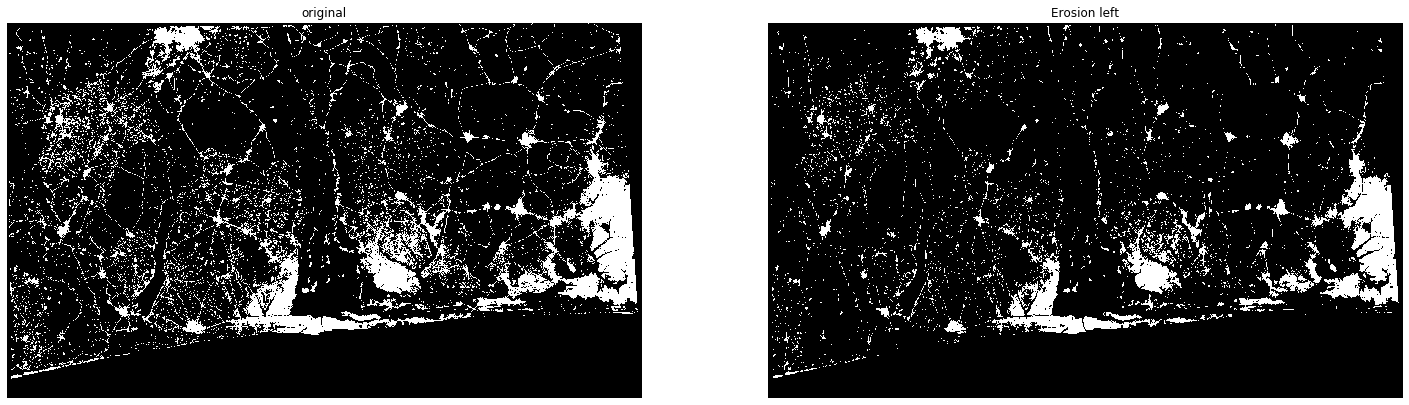

In [78]:
# define structuriment, called footprint here
se_left = np.array([[1,0,0,],
            [1,0,0,],
            [1,0,0]])
plot_comparison(array,erosion(array,se_left),"Erosion left")

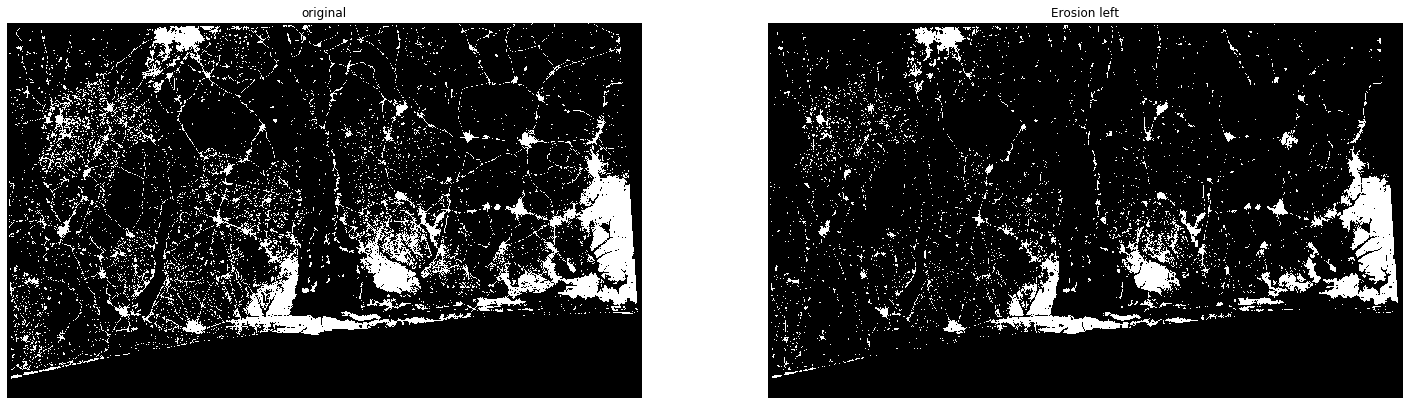

In [79]:
# define structuriment, called footprint here
se_right = np.array([[0,0,1],
            [0,0,1],
            [0,0,1]])
plot_comparison(array,erosion(array,se_right),"Erosion right")

Structuring Element:
 [[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


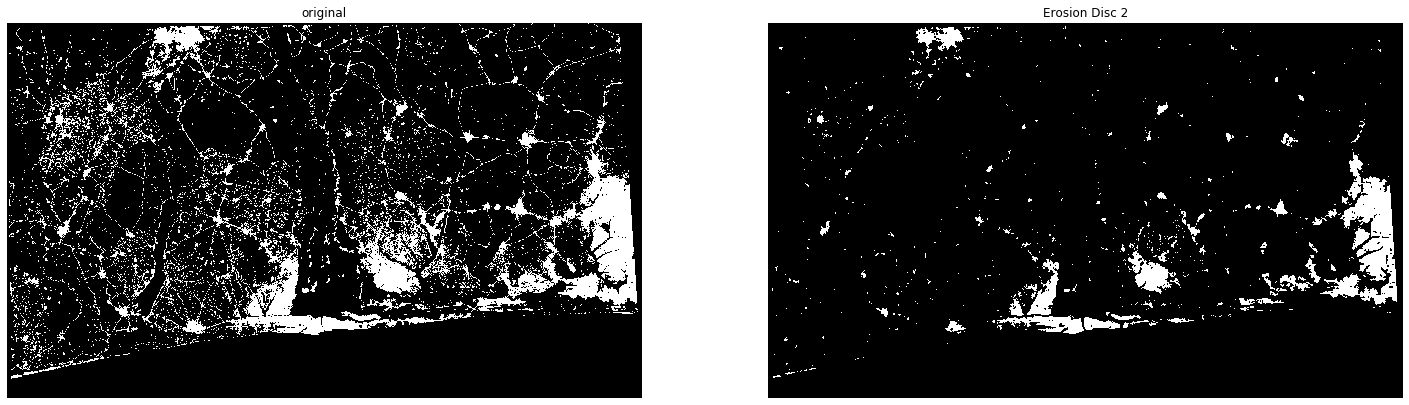

In [92]:
se_disc_2 = disk(2)
print("Structuring Element:\n",se_disc_2)
plot_comparison(array,erosion(array,se_disc_2),"Erosion Disc 2")

Structuring Element:
 [[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]


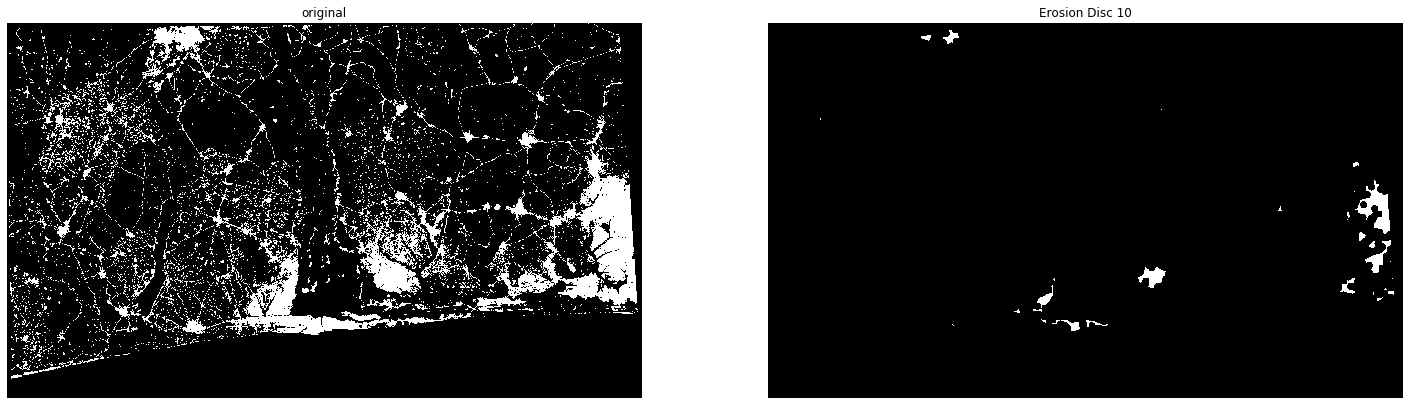

In [93]:
se_disc_10 = disk(10)
print("Structuring Element:\n",se_disc_10)
plot_comparison(array,erosion(array,se_disc_10),"Erosion Disc 10")

## Dilation

Structuring Element:
 [[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


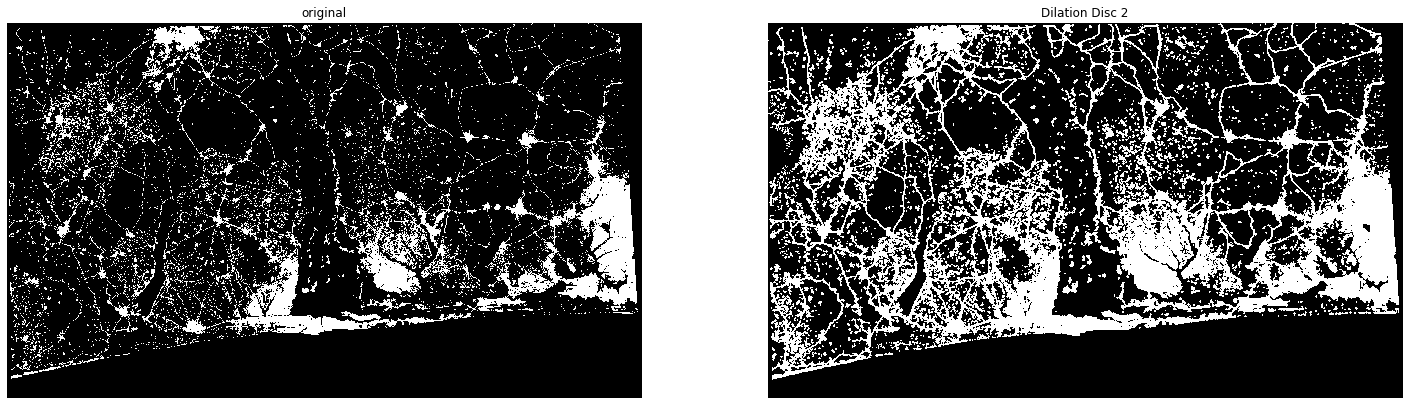

In [102]:
se_dilution_disc2 = disk(2)
print("Structuring Element:\n",se_dilution_disc2)
plot_comparison(array,dilation(array,se_dilution_disc2),"Dilation Disc 2")

Structuring Element:
 [[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]


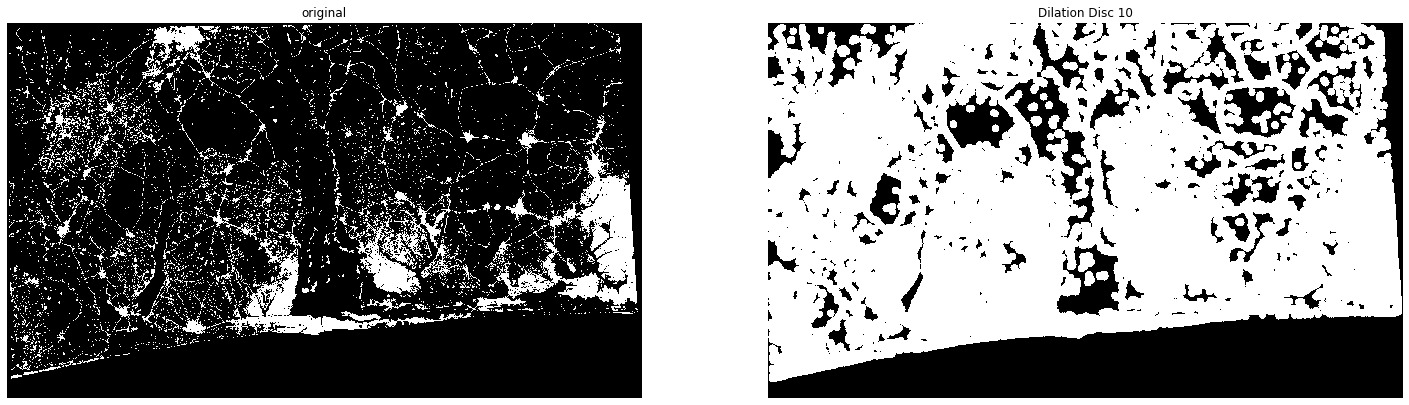

In [101]:
se_dilution_disc10 = disk(10)
print("Structuring Element:\n",se_dilution_disc10)
plot_comparison(array,dilation(array,se_dilution_disc10),"Dilation Disc 10")

## Opening
Opening is defined as an erosion followed by a dilation. This removes small bright spots (speckle), thereore removing smaller white lines like roads and small settlements

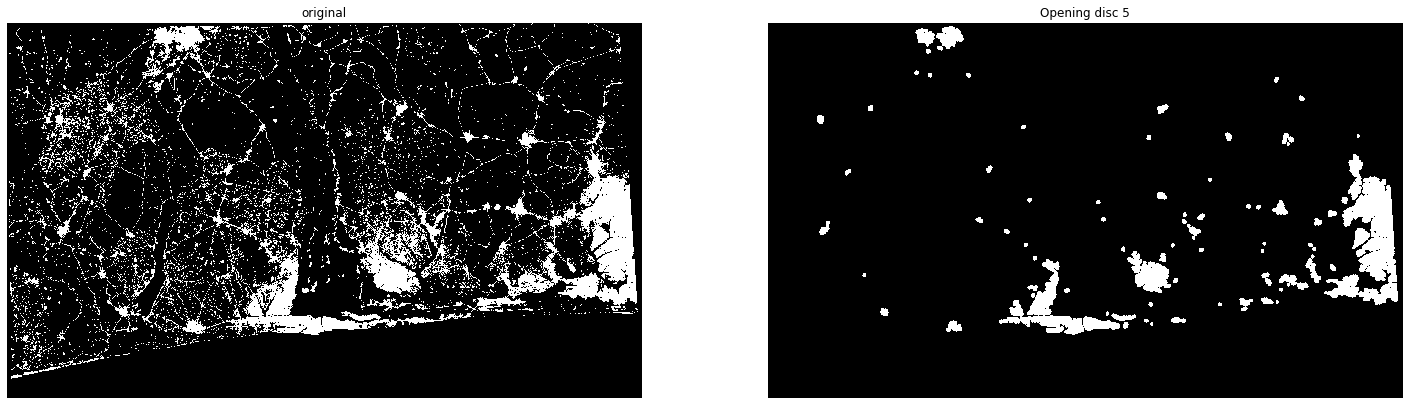

In [110]:
se_opening = disk(5)

pass_1 = erosion(array,se_opening)
pass_2 = dilation(pass_1,se_opening)

plot_comparison(array,pass_2,"Opening disc 5")

## Closing
Dilation followed by erosion, removes small black spots, therefore connecting areas that were separated beforem closing gaps in the middle of towns etc.

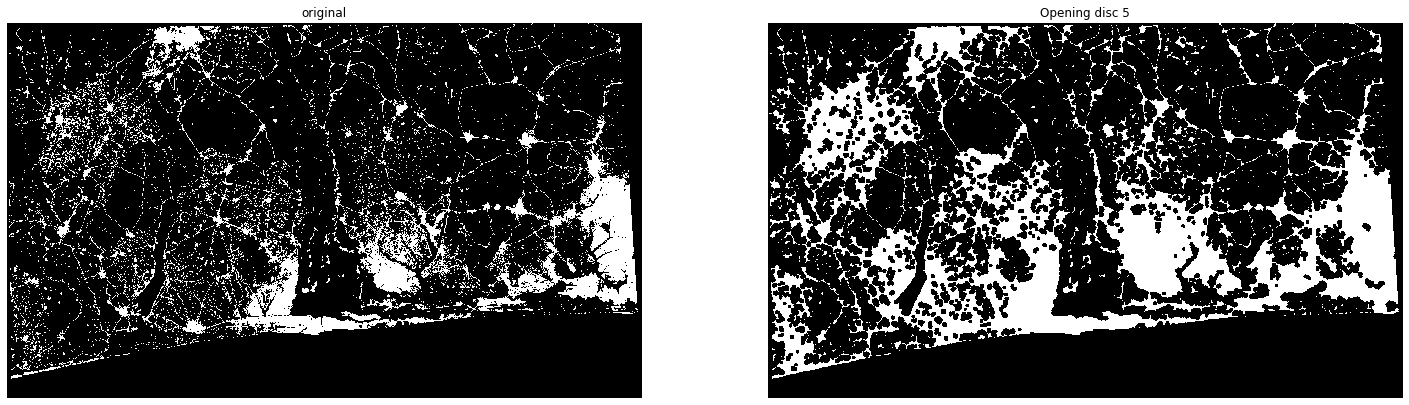

In [111]:
se_opening = disk(5)

pass_1 = dilation(array,se_opening)
pass_2 = erosion(pass_1,se_opening)

plot_comparison(array,pass_2,"Opening disc 5")